In [1]:
# Installing necessary Libraries that are essential,
# !pip install pandas,
# !pip install numpy,
# !pip install matplotlib,
# !pip install searborn,
# !pip install scikit-learn,
# !pip install warnings,
# !pip install statsmodels
# !pip install autoviz,
# !pip install itertools,
# !pip install requests,
# !pip install chardet,

# Importing necessary Libraries that are essential for the EDA and Modelling
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as sm
from scipy.cluster.hierarchy import dendrogram
import os
import itertools
import requests
import chardet
import math

from autoviz.AutoViz_Class import AutoViz_Class
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, QuantileTransformer
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, silhouette_score, roc_auc_score, roc_curve, auc, classification_report, plot_confusion_matrix, confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, log_loss
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.multioutput import MultiOutputClassifier
from sklearn.tree import plot_tree, DecisionTreeClassifier, export_text
from sklearn import tree, linear_model
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn.cluster import KMeans, AgglomerativeClustering

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


In [2]:
# Loading the JG Candy Records dataset and displaying first few records of it
df = pd.read_csv('Week_4.csv')
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0.0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0.0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0.0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0.0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0.0,0.906,0.511,52.341465


In [3]:
# Column level datatype information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
competitorname      85 non-null object
chocolate           85 non-null int64
fruity              85 non-null int64
caramel             85 non-null int64
peanutyalmondy      85 non-null int64
nougat              85 non-null int64
crispedricewafer    85 non-null int64
hard                85 non-null int64
bar                 85 non-null int64
pluribus            61 non-null float64
sugarpercent        85 non-null float64
pricepercent        82 non-null float64
winpercent          85 non-null float64
dtypes: float64(4), int64(8), object(1)
memory usage: 8.8+ KB


In [4]:
# Checking null values in the columns
df.isnull().sum()

competitorname       0
chocolate            0
fruity               0
caramel              0
peanutyalmondy       0
nougat               0
crispedricewafer     0
hard                 0
bar                  0
pluribus            24
sugarpercent         0
pricepercent         3
winpercent           0
dtype: int64

In [5]:
# Total number of records
n_records = df.shape[0]
n_records

85

In [6]:
# Dropping pluribus Column
df.drop('pluribus', axis = 1, inplace = True)

In [7]:
# Displaying first few records of the dataframe
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0.906,0.511,52.341465


In [8]:
# Mean of the Ice Cream Products Consumed Per Week
medianOfPricepercent = round(df['pricepercent'].median(), 2)
medianOfPricepercent

0.47

In [9]:
df['pricepercent'].fillna(medianOfPricepercent, inplace = True)

In [10]:
df.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.478647,0.467294,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.282778,0.278819,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.267000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.465000,0.470000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


In [11]:
list(set(df.dtypes.tolist()))
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,sugarpercent,pricepercent,winpercent
0,1,0,1,0,0,1,0,1,0.732,0.860,66.971725
1,1,0,0,0,1,0,0,1,0.604,0.511,67.602936
2,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,0,1,0,0,0,0,0,0,0.906,0.511,52.341465


In [12]:
sns.set_style("white")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2})

palette_style = "coolwarm"
color = "blue"

array([[<AxesSubplot:title={'center':'bar'}>,
        <AxesSubplot:title={'center':'caramel'}>,
        <AxesSubplot:title={'center':'chocolate'}>],
       [<AxesSubplot:title={'center':'crispedricewafer'}>,
        <AxesSubplot:title={'center':'fruity'}>,
        <AxesSubplot:title={'center':'hard'}>],
       [<AxesSubplot:title={'center':'nougat'}>,
        <AxesSubplot:title={'center':'peanutyalmondy'}>,
        <AxesSubplot:title={'center':'pricepercent'}>],
       [<AxesSubplot:title={'center':'sugarpercent'}>,
        <AxesSubplot:title={'center':'winpercent'}>, <AxesSubplot:>]],
      dtype=object)

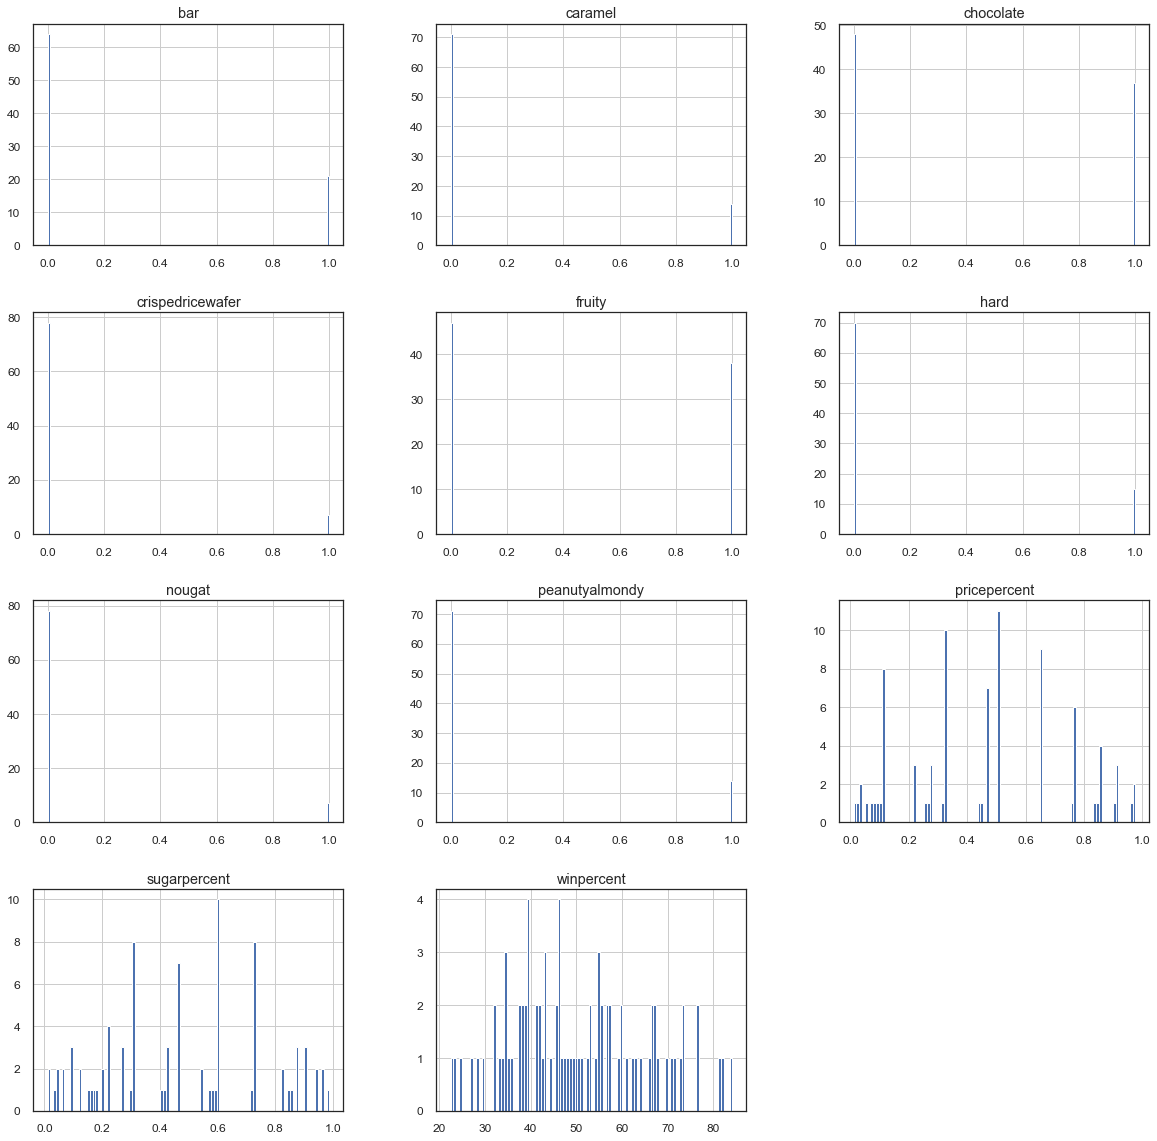

In [27]:
df_num.hist(figsize=(20, 20), bins=100, xlabelsize=12, ylabelsize=12)

<AxesSubplot:>

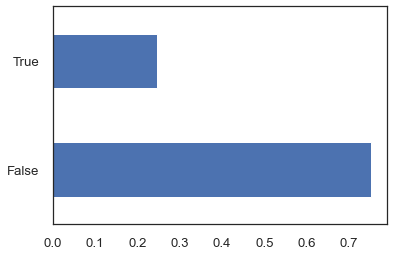

In [28]:
df['bar'].value_counts(normalize=True).plot(kind='barh')

<AxesSubplot:>

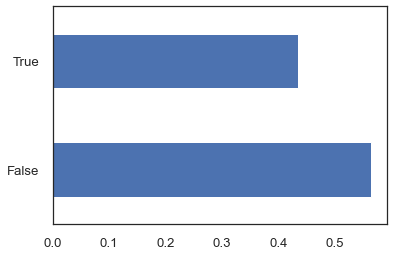

In [29]:
df['chocolate'].value_counts(normalize=True).plot(kind='barh')

<AxesSubplot:>

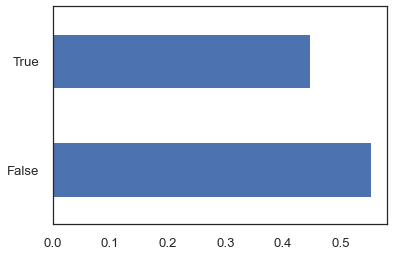

In [30]:
df['fruity'].value_counts(normalize=True).plot(kind='barh')

<AxesSubplot:>

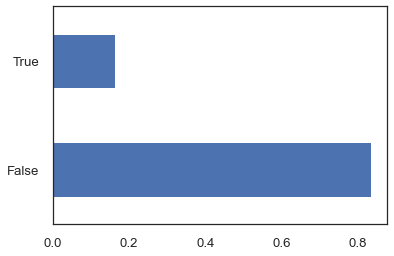

In [31]:
df['caramel'].value_counts(normalize=True).plot(kind='barh')

<AxesSubplot:>

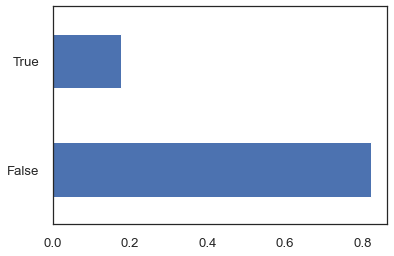

In [32]:
df['hard'].value_counts(normalize=True).plot(kind='barh')

<AxesSubplot:>

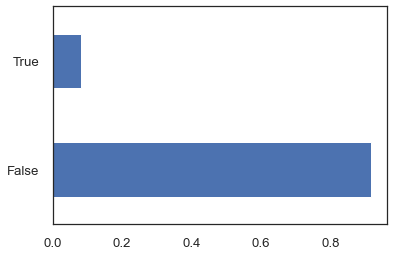

In [33]:
df['nougat'].value_counts(normalize=True).plot(kind='barh')

<AxesSubplot:>

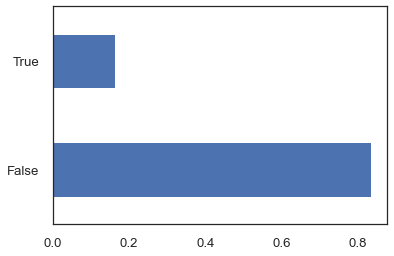

In [34]:
df['peanutyalmondy'].value_counts(normalize=True).plot(kind='barh')

<AxesSubplot:>

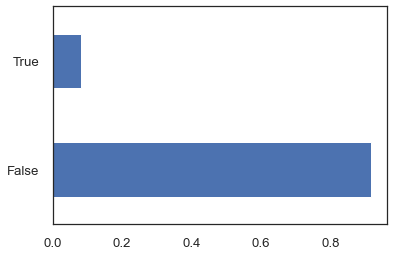

In [35]:
df['crispedricewafer'].value_counts(normalize=True).plot(kind='barh')

<AxesSubplot:ylabel='Frequency'>

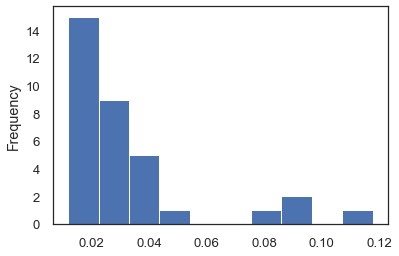

In [36]:
df['sugarpercent'].value_counts(normalize=True).plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

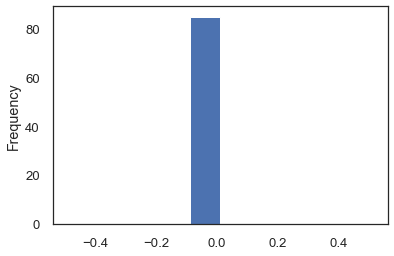

In [37]:
df['winpercent'].value_counts(normalize=True).plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

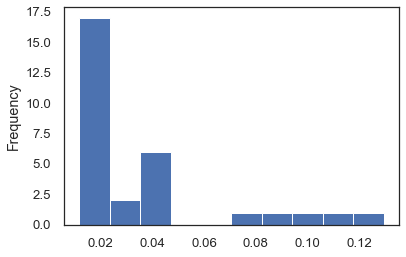

In [38]:
df['pricepercent'].value_counts(normalize=True).plot(kind='hist')

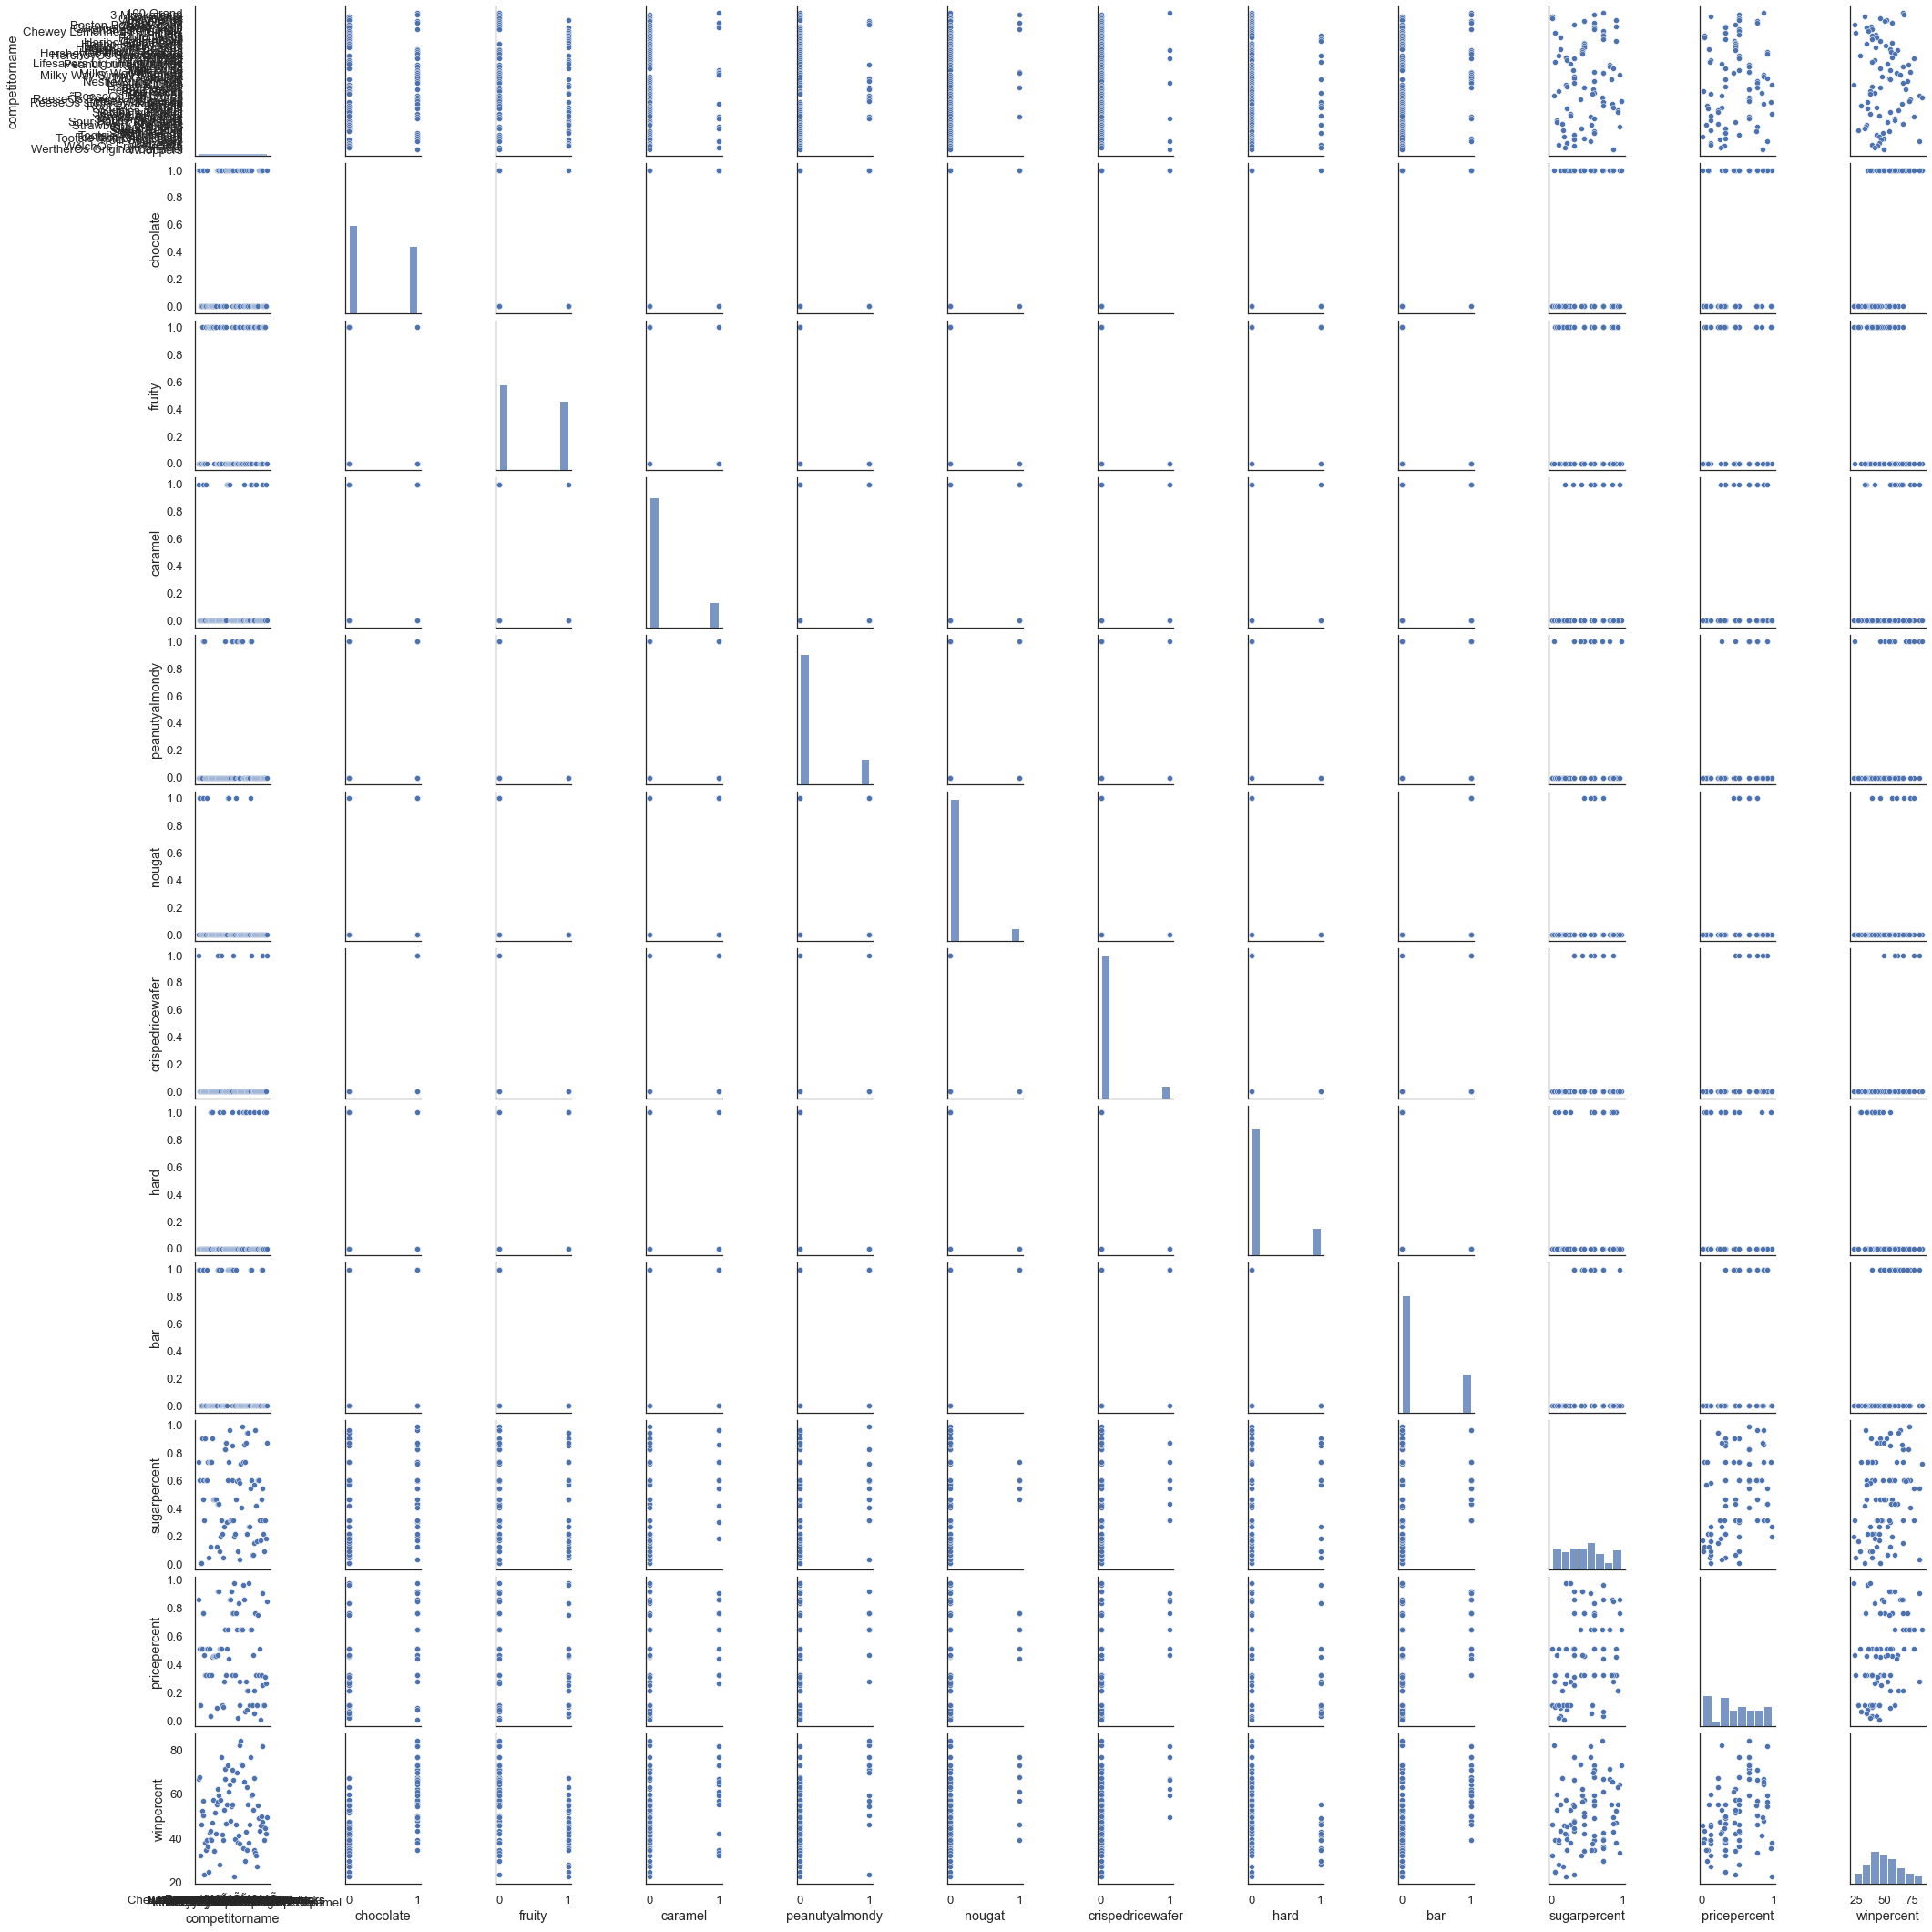

In [39]:
# Searborn's Pair Plot
sns.pairplot(data = df, vars=['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'sugarpercent',
       'pricepercent', 'winpercent'])
plt.show()

In [13]:
df.columns

Index(['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'sugarpercent',
       'pricepercent', 'winpercent'],
      dtype='object')

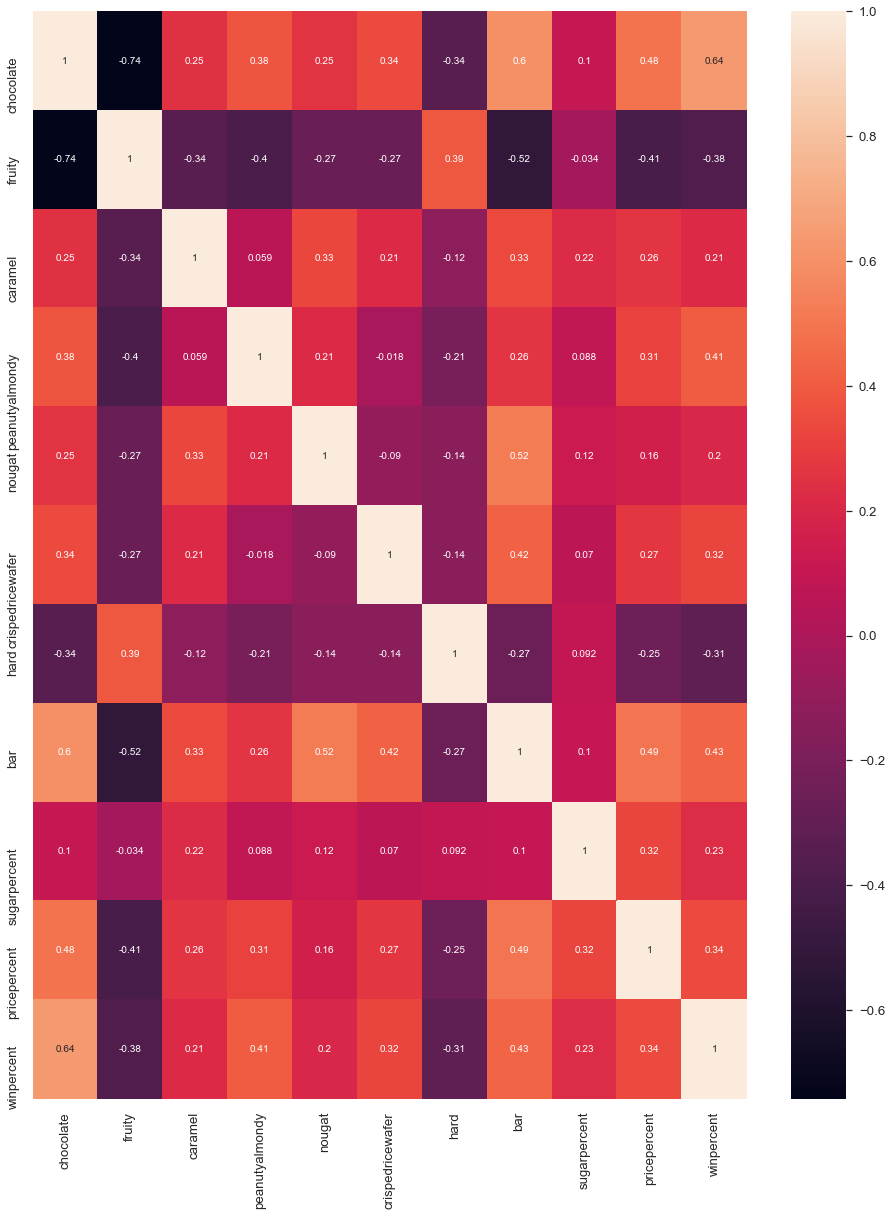

In [40]:
# Heat Map
df.corr()
plt.figure(figsize=(16, 20))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [16]:
target_name = 'winpercent'

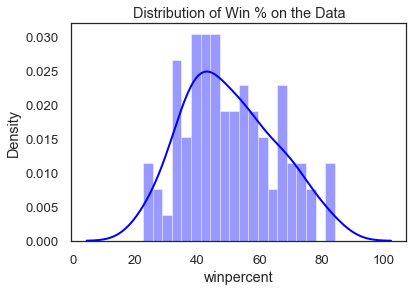

In [41]:
sns.distplot(df[target_name], bins=20, color = 'blue')

plt.title("Distribution of Win % on the Data")
plt.ylabel("Density")
plt.show()

In [18]:
bool_feature_list = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar']
df[bool_feature_list] = df[bool_feature_list].astype(bool)

In [19]:
# list of numerical features
numeric_feature_list = df.select_dtypes(include=['int', 'float']).columns.tolist()

# remove target variable from numerical feature list
numeric_feature_list = [f for f in numeric_feature_list if not f==target_name]
numeric_feature_list

['sugarpercent', 'pricepercent']

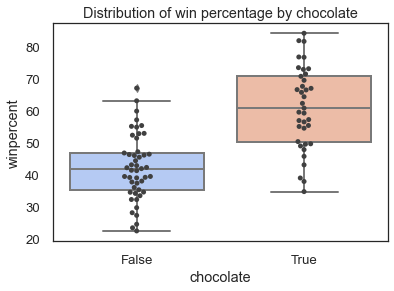

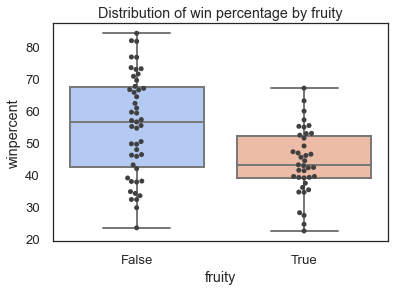

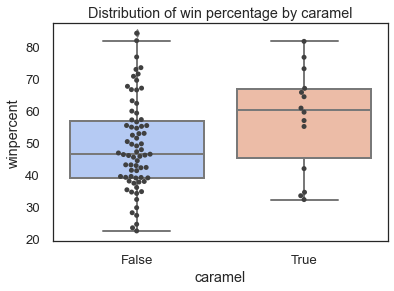

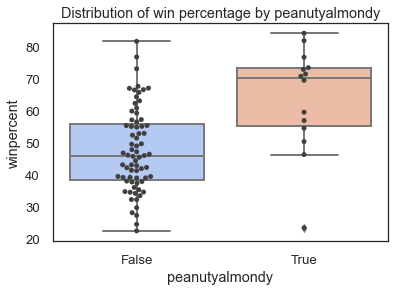

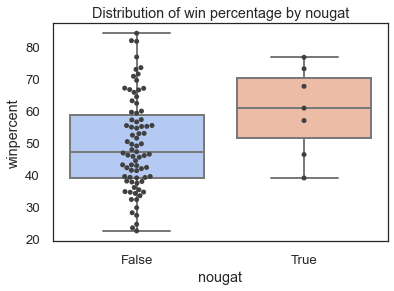

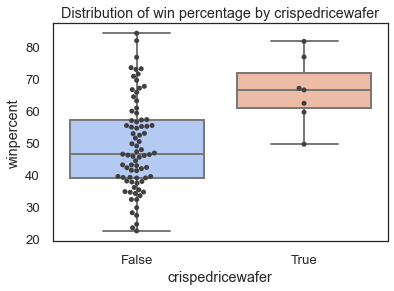

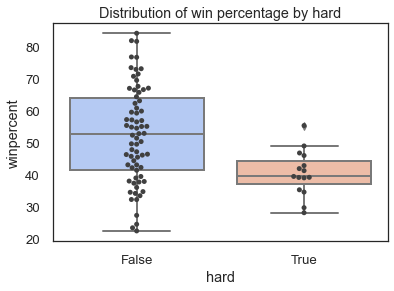

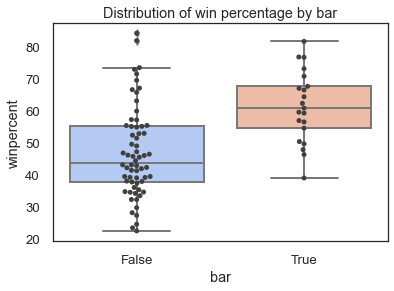

In [42]:
for feature_name in bool_feature_list:
    
    ax = sns.boxplot(x=feature_name, y=target_name, data=df, palette=palette_style)
    ax = sns.swarmplot(x=feature_name, y=target_name, data=df, color=".25")
    
    # Format plot title
    plot_title_str = 'Distribution of win percentage by {}'.format(feature_name)    
    plt.title(plot_title_str)
    
    # Format file name
    file_name_str = "./plots/target_dist_by_{}".format(feature_name)
    plt.show();

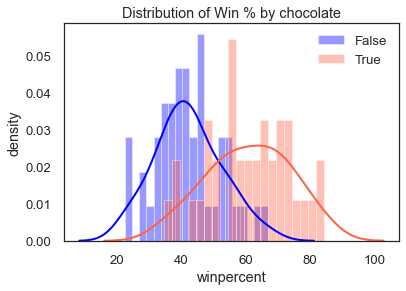

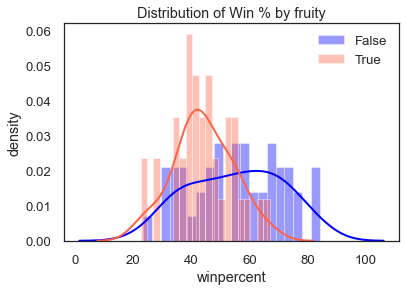

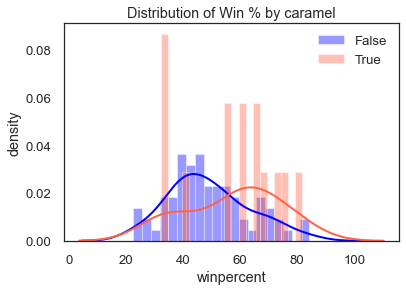

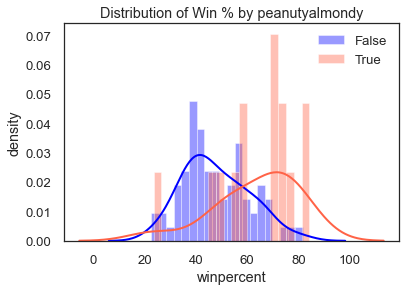

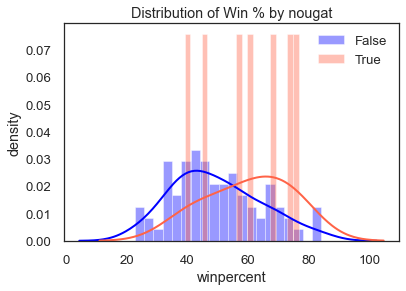

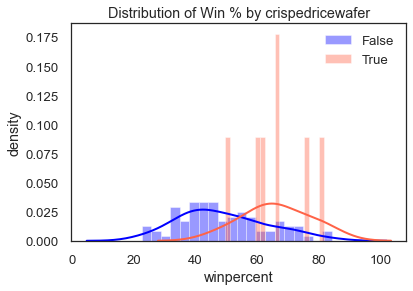

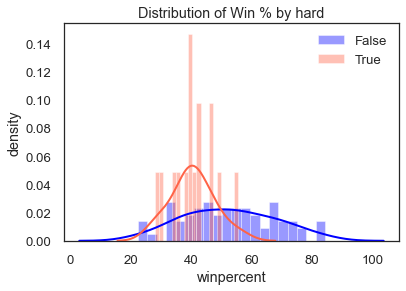

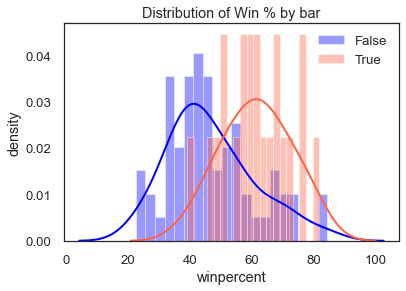

In [43]:
for feature_name in bool_feature_list:
    
    sns.distplot(df.loc[df[feature_name]==False, target_name], bins=20, color = 'blue', label='False')
    sns.distplot(df.loc[df[feature_name]==True, target_name], bins=20, color = 'tomato', label='True')
    
    # Format plot title
    plot_title_str = 'Distribution of Win % by {}'.format(feature_name)
    plt.ylabel("density")
    plt.title(plot_title_str)
    
    plt.legend()
    plt.show()

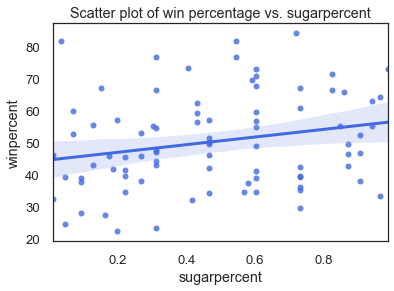

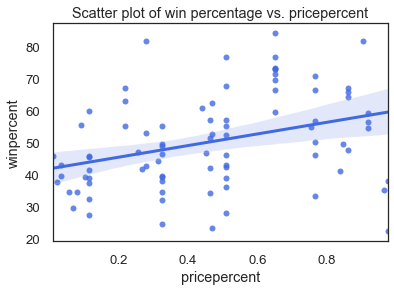

In [44]:
for feature_name in numeric_feature_list:
    
    ax = sns.regplot(x=feature_name, y=target_name, data=df, color='royalblue')
    
    # Format plot title
    plot_title_str = 'Scatter plot of win percentage vs. {}'.format(feature_name)    
    plt.title(plot_title_str)
    
    # Format file name
    file_name_str = "./plots/target_regression_by_{}".format(feature_name)
    
    plt.show();

In [23]:
f1 = 'chocolate'
f2 = 'fruity'
df_aux = pd.DataFrame(np.zeros((2, 2)), index=[[f1, f1],['Yes','No']], columns=[[f2, f2],['Yes','No']])

idx = pd.IndexSlice
df_aux.loc[idx[f1,'No'], idx[:,'No']] = df[(df[f1]==False) & (df[f2]==False)].count()[0]
df_aux.loc[idx[f1,'No'], idx[:,'Yes']] = df[(df[f1]==False) & (df[f2]==True)].count()[0]
df_aux.loc[idx[f1,'Yes'], idx[:,'No']] = df[(df[f1]==True) & (df[f2]==False)].count()[0]
df_aux.loc[idx[f1,'Yes'], idx[:,'Yes']] = df[(df[f1]==True) & (df[f2]==True)].count()[0]
assert df_aux.sum().sum() == 85
df_aux.astype(int)

fruity    
                 Yes  No
chocolate Yes      1  36
          No      37  11

In [24]:
# Auto Visualization Class
AV = AutoViz_Class()

Shape of your Data Set: (85, 13)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  3
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  9
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    13 Predictors classified...
        This does not include the Target column(s)
        1 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 6


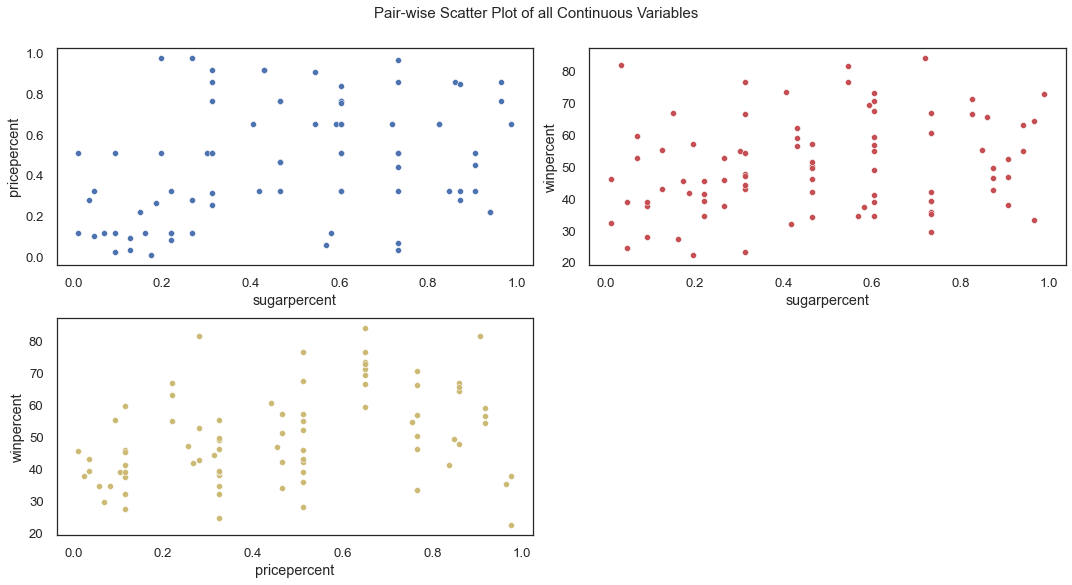

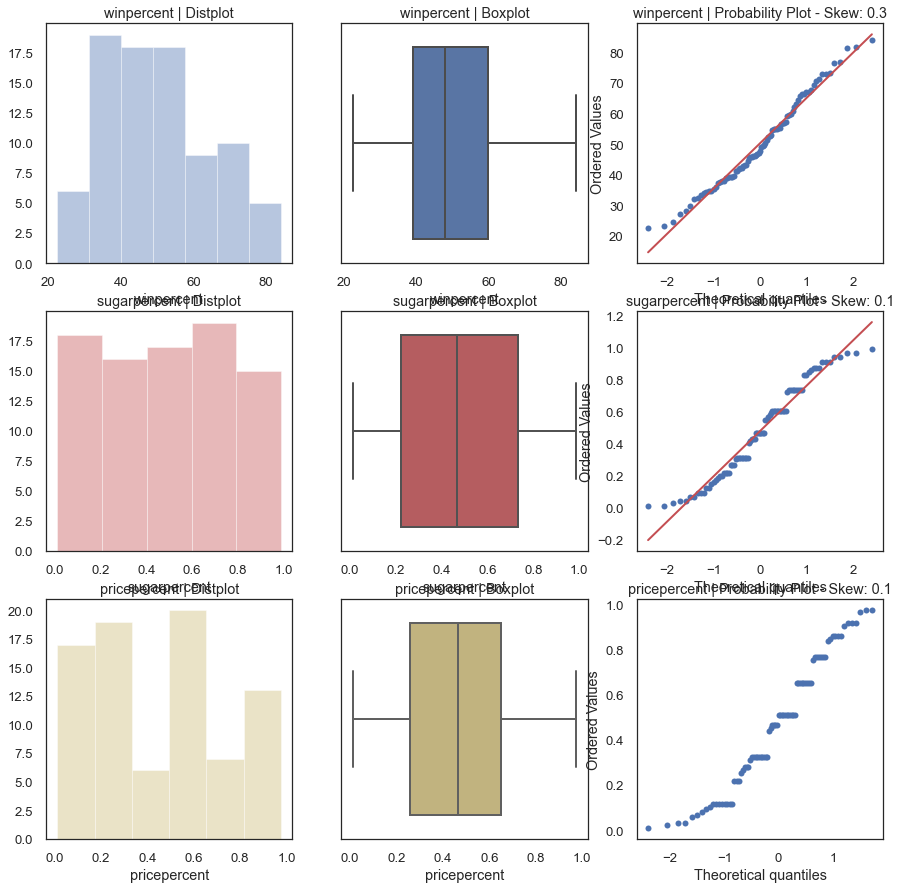

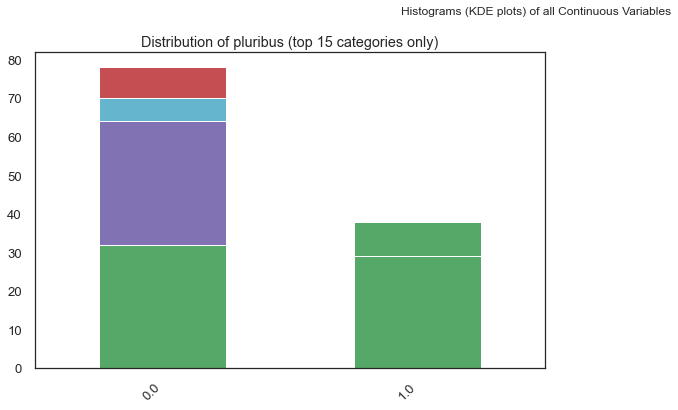

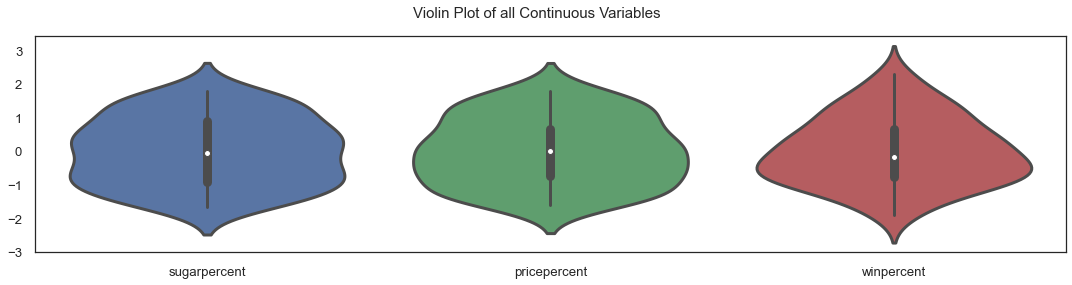

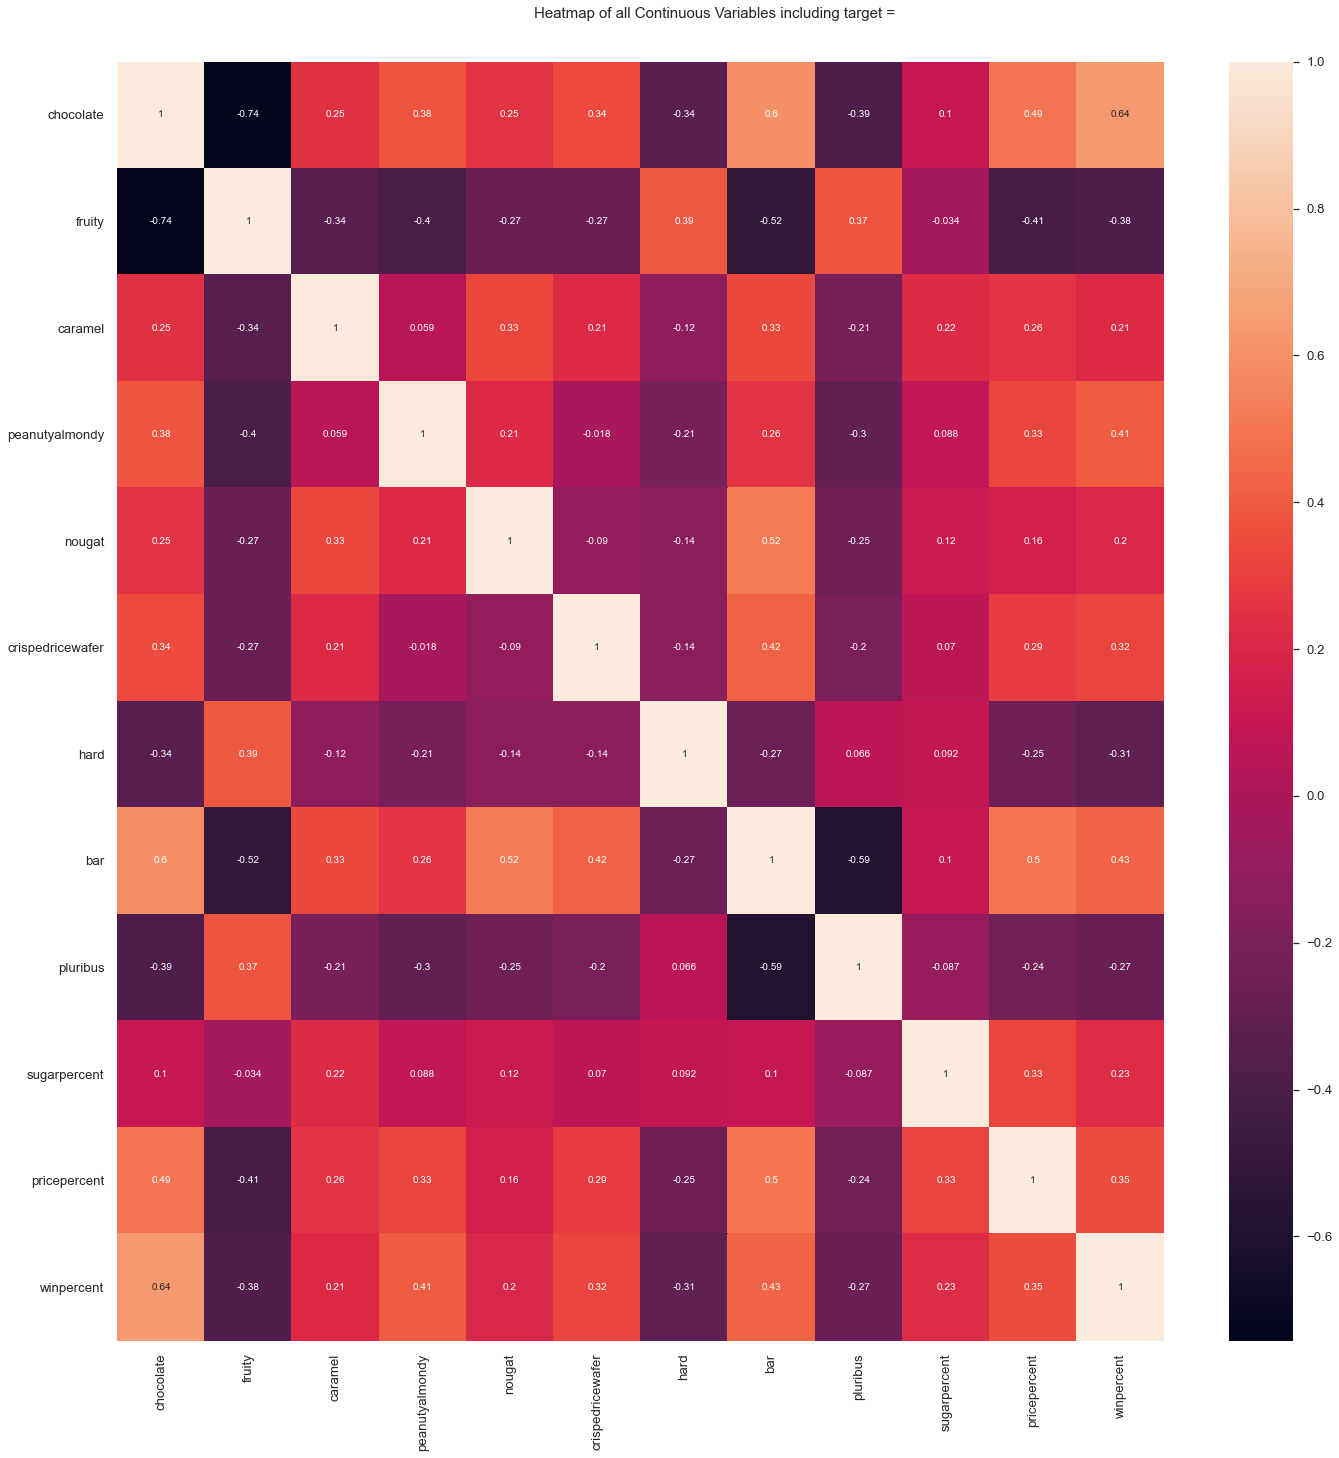

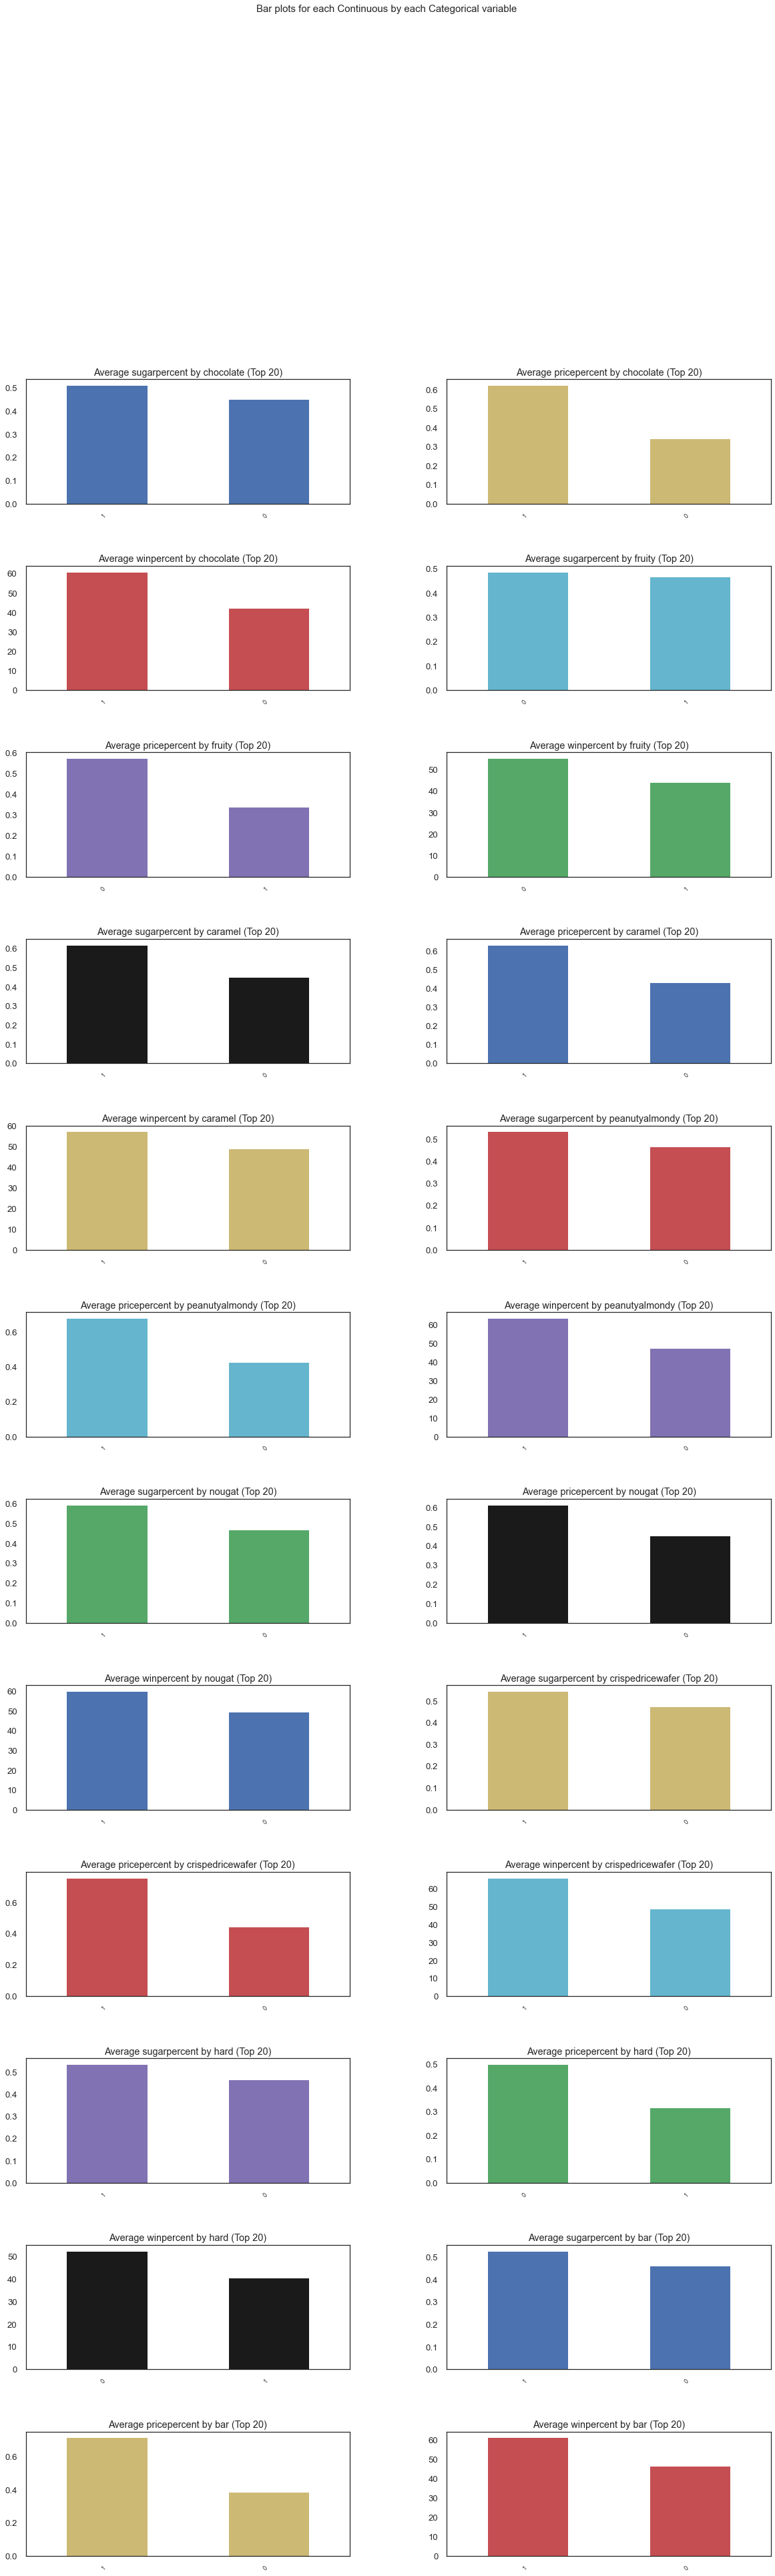

Time to run AutoViz (in seconds) = 10.183

 ###################### VISUALIZATION Completed ########################


In [25]:
filename = "Week_4.csv"
sep = ","
dft = AV.AutoViz(
    filename,
    sep=",",
    depVar="",
    dfte=None,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=100,
    max_cols_analyzed=15,
)

In [26]:
df.head(5)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,sugarpercent,pricepercent,winpercent
0,100 Grand,True,False,True,False,False,True,False,True,0.732,0.860,66.971725
1,3 Musketeers,True,False,False,False,True,False,False,True,0.604,0.511,67.602936
2,One dime,False,False,False,False,False,False,False,False,0.011,0.116,32.261086
3,One quarter,False,False,False,False,False,False,False,False,0.011,0.511,46.116505
4,Air Heads,False,True,False,False,False,False,False,False,0.906,0.511,52.341465


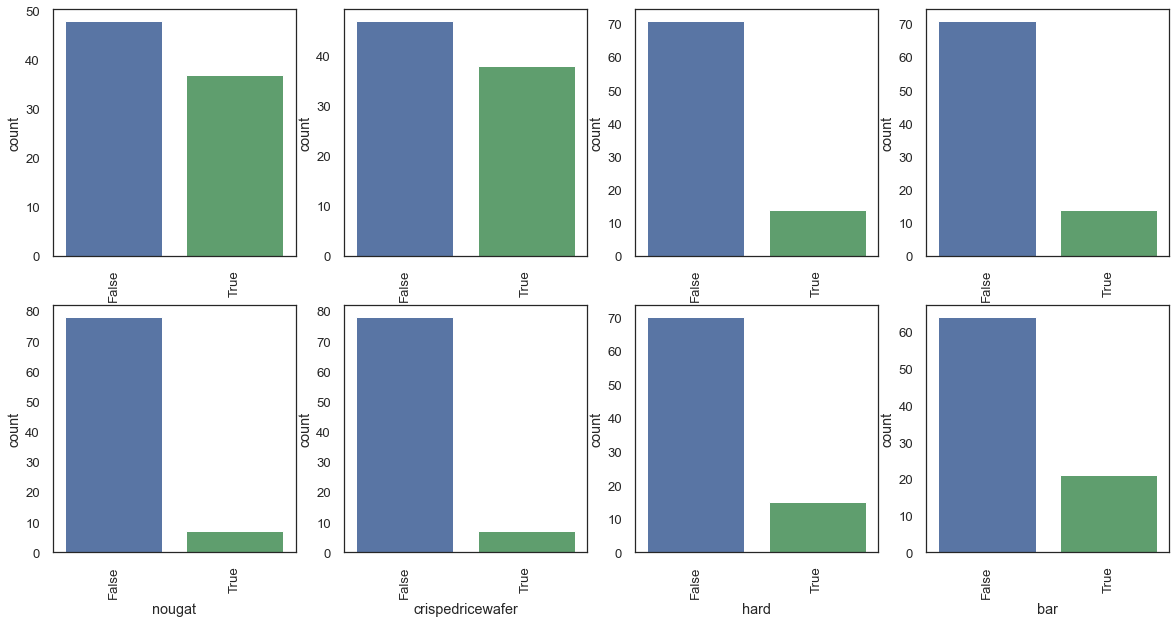

In [45]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
categorical = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar']
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [46]:
def regression_results(y_true, y_pred):
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('Explained Varaiance: ', round(explained_variance,4))    
    print('Mean Squared Log Error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [47]:
# linear regression y = winpercent, x = sugarpercent, pricepercent
y = df["winpercent"]
X = df[["sugarpercent", "pricepercent"]]

In [48]:
linear_regression_model = LinearRegression(fit_intercept=True)
linear_regression_model.fit(X, y)

LinearRegression()

In [49]:
y_pred = linear_regression_model.predict(X)
score = linear_regression_model.score(X, y)
mse = mean_squared_error(y, y_pred)

In [50]:
coeffs = pd.DataFrame(linear_regression_model.coef_, X.columns, columns=['coef'])
intercept  = linear_regression_model.intercept_

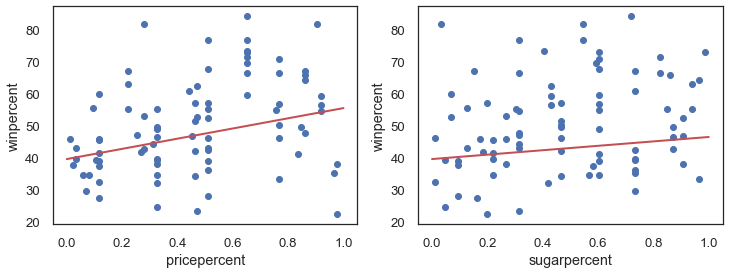

In [51]:
fig = plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.scatter(x=df["pricepercent"], y=df["winpercent"])

x = np.linspace(0, 1)
y1 = coeffs.values[1]*x + intercept
plt.plot(x, y1, "r-")
plt.xlabel("pricepercent")
plt.ylabel("winpercent")

plt.subplot(1, 2, 2)
plt.scatter(x=df["sugarpercent"], y=df["winpercent"])
y2 = coeffs.values[0]*x + intercept
plt.plot(x, y2, "r-")
plt.xlabel("sugarpercent")
plt.ylabel("winpercent")

plt.show()

In [52]:
print (f'Linear Regression Results:\n')
print (f'{coeffs}')
print (f'\nIntercept: {round (intercept, 2)}')
regression_results(y, y_pred)

Linear Regression Results:

                   coef
sugarpercent   6.895835
pricepercent  15.920254

Intercept: 39.58
Explained Varaiance:  0.1342
Mean Squared Log Error:  0.0774
r2:  0.1342
MAE:  10.7892
MSE:  185.2559
RMSE:  13.6109


In [53]:
# linear regression for categories
y = df["winpercent"]
X = df.drop(["winpercent", "competitorname", "sugarpercent", "pricepercent"],axis=1)

In [54]:
linear_regression_model = LinearRegression(fit_intercept=True)
linear_regression_model.fit(X, y)

LinearRegression()

In [55]:
y_pred = linear_regression_model.predict(X)
score = linear_regression_model.score(X, y)
mse = mean_squared_error(y, y_pred)

coeffs = pd.DataFrame(linear_regression_model.coef_, X.columns, columns=['coef']).sort_values('coef', ascending = False)
intercept  = linear_regression_model.intercept_

In [56]:
print (f'Linear Regression Results:\n')
print (f'{coeffs}')
print (f'\nIntercept: {round (intercept, 2)}')
regression_results(y, y_pred)

Linear Regression Results:

                       coef
chocolate         19.903045
fruity            10.265975
peanutyalmondy    10.158741
crispedricewafer   8.979807
caramel            3.405810
nougat             2.402144
bar               -0.605214
hard              -4.837393

Intercept: 34.9
Explained Varaiance:  0.5148
Mean Squared Log Error:  0.0469
r2:  0.5148
MAE:  8.1144
MSE:  103.8177
RMSE:  10.1891


In [57]:
perfect_candy_score = intercept+coeffs.values[0]+coeffs.values[2]+coeffs.values[3]+coeffs.values[4]+coeffs.values[5]+coeffs.values[7]
print (f'Perfect Candy Score: {round(perfect_candy_score[0], 1)}%')

Perfect Candy Score: 74.9%


In [58]:
reg_formula_str = target_name + ' ~ ' + ' + '.join([col for col in df.columns[:] if col!=target_name and col!='competitorname'])
print(reg_formula_str)

winpercent ~ chocolate + fruity + caramel + peanutyalmondy + nougat + crispedricewafer + hard + bar + sugarpercent + pricepercent


In [59]:
result = sm.ols(formula=reg_formula_str, data=df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             winpercent   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     8.575
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           3.97e-09
Time:                        15:28:54   Log-Likelihood:                -315.95
No. Observations:                  85   AIC:                             653.9
Df Residuals:                      74   BIC:                             680.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [60]:
# select a subset of columns to use
df_test = df.loc[:,['winpercent','chocolate','fruity','peanutyalmondy','crispedricewafer','hard','sugarpercent']]
# create boolean feature chocolate & peanutyalmondy
df_test.loc[:,'chocolate_peanutyalmondy'] = (df_test.loc[:,'chocolate']==True) & (df_test.loc[:,'peanutyalmondy']==True)
# create boolean feature chocolate & crispedricewafer
df_test.loc[:,'chocolate_crispedricewafer'] = (df_test.loc[:,'chocolate']==True) & (df_test.loc[:,'crispedricewafer']==True)
# create boolean feature fruity & hard
df_test.loc[:,'fruity_hard'] = (df_test.loc[:,'fruity']==True) & (df_test.loc[:,'hard']==True)
# create boolean feature high sugar content.
df_test.loc[:,'highsugar'] = df_test.loc[:,'sugarpercent'] > 0.8
# drop columns we will not use in the regression
df_test = df_test.drop(columns=['crispedricewafer','peanutyalmondy', 'hard', 'sugarpercent'])
df_test.columns

Index(['winpercent', 'chocolate', 'fruity', 'chocolate_peanutyalmondy',
       'chocolate_crispedricewafer', 'fruity_hard', 'highsugar'],
      dtype='object')

In [61]:
reg_formula_str = target_name + ' ~ ' + ' + '.join([col for col in df_test.columns[:] if col!=target_name and col!='competitorname'])
print(reg_formula_str)

winpercent ~ chocolate + fruity + chocolate_peanutyalmondy + chocolate_crispedricewafer + fruity_hard + highsugar


In [62]:
result_test = sm.ols(formula=reg_formula_str, data=df_test).fit()
print(result_test.summary())

                            OLS Regression Results                            
Dep. Variable:             winpercent   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     16.36
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           4.23e-12
Time:                        15:28:58   Log-Likelihood:                -314.04
No. Observations:                  85   AIC:                             642.1
Df Residuals:                      78   BIC:                             659.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [63]:
df.winpercent.describe()[:2].round(1)

count    85.0
mean     50.3
Name: winpercent, dtype: float64

In [64]:
df.loc[(df.chocolate==True) & (df.peanutyalmondy==True),:].winpercent.describe()[:2]

count    12.000000
mean     68.503791
Name: winpercent, dtype: float64

In [65]:
df.loc[(df.chocolate==False) | (df.peanutyalmondy==False),:].winpercent.describe()[:2]

count    73.000000
mean     47.327115
Name: winpercent, dtype: float64

In [66]:
df.loc[(df.chocolate==False) & (df.peanutyalmondy==False),:].winpercent.describe()[:2]

count    46.000000
mean     42.458998
Name: winpercent, dtype: float64

In [67]:
df.loc[(df.chocolate==True) & (df.peanutyalmondy==True) & (df.sugarpercent>0.8),:].winpercent.describe()[:2]

count     2.000000
mean     72.176476
Name: winpercent, dtype: float64

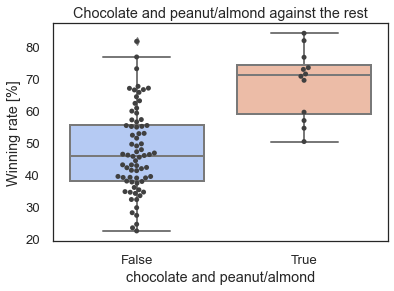

In [68]:
ax = sns.boxplot(x='chocolate_peanutyalmondy', y=target_name, data=df_test, palette=palette_style)
ax = sns.swarmplot(x='chocolate_peanutyalmondy', y=target_name, data=df_test, color=".25")
 
plt.title('Chocolate and peanut/almond against the rest')
plt.ylabel("Winning rate [%]")
plt.xlabel("chocolate and peanut/almond")

plt.show();

In [69]:
## exploring structure of data
useful_columns = ["chocolate", "fruity", "caramel", "peanutyalmondy", "nougat", "crispedricewafer", "hard", "bar"]

data_sorted = df.sort_values('winpercent', ascending = True)
data_length = len(data_sorted)
divisions = 4
segments = []

segment_values = []
final_values_dict = {}

for i in range (0, divisions):
    #segments.append (data_sorted[(i*data_length//divisions):((i+1)*data_length//divisions)])
    temp_data = data_sorted[(i*data_length//divisions):((i+1)*data_length//divisions)]
    temp_dict = {}
    for col in useful_columns:
        temp_dict[col] = np.sum(temp_data[col])
    segment_values.append (temp_dict)

x_values = [25, 50, 75, 100]

for col in useful_columns:
    value_array = []
    for val in segment_values:
        value_array.append(val[col])
    final_values_dict[col] = value_array

In [70]:
# Top 25 and bottom 25 %
top25 = [float(segment_values[3][k]) for k in useful_columns]
bottom25 = [float(segment_values[0][k]) for k in useful_columns]

In [71]:
x = np.arange(len(useful_columns))  # the label locations
width = 0.35  # the width of the bars

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

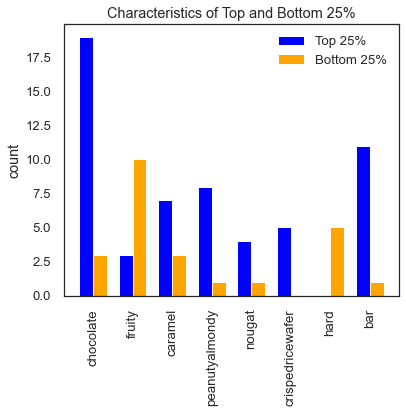

In [72]:
fig, ax = plt.subplots(figsize=(6, 5))
rects1 = ax.bar(x - width/2, top25, width, label='Top 25%', color="blue")
rects2 = ax.bar(x + width/2, bottom25, width, label='Bottom 25%', color="orange")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('count')
ax.set_title('Characteristics of Top and Bottom 25%')
ax.set_xticks(x)
ax.set_xticklabels(useful_columns)
plt.xticks(rotation=90)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.grid(True)

plt.show()

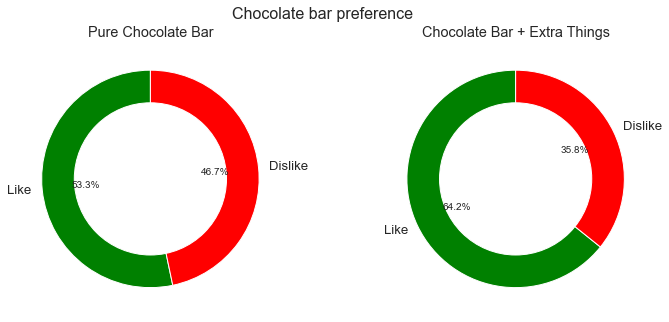

In [73]:
# pure chocolate bar vs chocolate with something

pure_choc_bar = df[(df["chocolate"] == 1) & (df["bar"] == 1) & (df["caramel"] == 0) & 
     (df["peanutyalmondy"] == 0) & (df["nougat"] == 0) & (df["crispedricewafer"] == 0)]

unpure_choc_bar = df[(df["chocolate"] == 1) & (df["bar"] == 1) & ((df["caramel"] == 1) | 
     (df["peanutyalmondy"] == 1) | (df["nougat"] == 1) | (df["crispedricewafer"] == 1))]

pure_choc_bar_percent = round(np.sum(pure_choc_bar["winpercent"])/len(pure_choc_bar), 2)
unpure_choc_bar_percent = round(np.sum(unpure_choc_bar["winpercent"])/len(unpure_choc_bar), 2)


# pie charts (graphics)
y_pure = np.array([pure_choc_bar_percent, 100-pure_choc_bar_percent])
y_unpure = np.array([unpure_choc_bar_percent, 100-unpure_choc_bar_percent])

pie_labels = ["Like", "Dislike"]

fig = plt.figure(figsize=(12,5))
fig.suptitle('Chocolate bar preference', fontsize=16)
plt.subplot(1, 2, 1)

plt.title('Pure Chocolate Bar')
plt.pie(y_pure, labels = pie_labels, startangle = 90, colors=["green", "red"], autopct='%1.1f%%')
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.subplot(1, 2, 2)
plt.title('Chocolate Bar + Extra Things')
plt.pie(y_unpure, labels = pie_labels, startangle = 90, colors=["green", "red"], autopct='%1.1f%%')
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show() 

In [74]:
# K means clustering to find main combinations
k_labels = ["caramel", "peanutyalmondy", "nougat", "crispedricewafer", "winpercent"]

df = df.drop(["competitorname", "sugarpercent", "pricepercent"],axis=1)

df = df[(df["chocolate"] == 1) & (df["bar"] == 1) & (df["fruity"] == 0)]
df = df[k_labels]
df["winpercent"] = df["winpercent"]/100  # scale to fit categorical data distances

data_KMeans = df

In [75]:
## unique candy classes
unique_candy_classes = len(data_KMeans.drop_duplicates())

In [76]:
## elbow method
distortions = []
K = range(1,unique_candy_classes)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data_KMeans)
    distortions.append(kmeanModel.inertia_)

In [77]:
## silhouette method
range_n_clusters = range(2,unique_candy_classes)
scores = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(df)
    centers = clusterer.cluster_centers_

    score = silhouette_score(df, preds)
    scores.append(score)

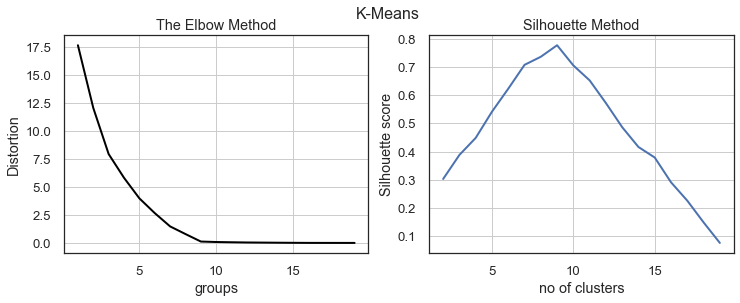

In [78]:
# graphics
fig = plt.figure(figsize=(12,4))
fig.suptitle('K-Means', fontsize=16)

plt.subplot(1, 2, 1)
plt.title('The Elbow Method')
plt.plot(K, distortions, '+-', color="black")
plt.xlabel('groups'); plt.ylabel('Distortion'); plt.grid(True)

plt.subplot(1, 2, 2)
plt.title('Silhouette Method')
plt.plot(range_n_clusters, scores)
plt.grid(True)
plt.xlabel("no of clusters")
plt.ylabel("Silhouette score")

plt.show()

In [79]:
kmeanModel = KMeans(n_clusters=9)
kmeanModel.fit(data_KMeans)

KMeans(n_clusters=9)

In [80]:
df = pd.DataFrame (data=np.round(kmeanModel.cluster_centers_, 3), columns=k_labels)
df["winpercent"] = df["winpercent"]*100  # unscale winpercent to range 0-100
print ("Main Candy subgroups\n")
print (df.sort_values("winpercent", ascending=False))

Main Candy subgroups

   caramel  peanutyalmondy  nougat  crispedricewafer  winpercent
5      1.0             0.0     0.0               1.0        74.3
3      0.0             0.0     0.0               1.0        68.5
2      1.0             0.0     1.0               0.0        67.0
7      1.0             1.0     1.0               0.0        66.8
8      1.0             0.0     0.0               0.0        64.4
0      1.0             1.0     0.0               1.0        59.5
4      0.0             1.0     0.0               0.0        58.5
1      0.0             0.0     0.0               0.0        53.3
6      0.0             0.0     1.0               0.0        53.3


In [81]:
def cbcaw(array): # chocolate_bar_composite_average_winpercent
    try:
        selection = ddf[(df["chocolate"] == 1) & (df["bar"] == 1) & (df["caramel"] == array[0]) & 
         (df["peanutyalmondy"] == array[1]) & (df["nougat"] == array[2]) & 
                         (df["crispedricewafer"] == array[3])]
    except:
        return np.nan
    else:
        return round(np.sum(selection["winpercent"])/len(selection), 2)

In [82]:
def interpret_structure(array):
    structure = []
    if array[0] == 1:
        structure.append("caramel")
    if array[1] == 1:
        structure.append("peanutyalmondy")
    if array[2] == 1:
        structure.append("nougat")
    if array[3] == 1:
        structure.append("crispedricewafer")
    return structure

In [83]:
def evaluate_structure(array):
    print (f'Structure of Candy: {interpret_structure(array)}')
    print (f'Average Win Percent of Combination: {cbcaw(array)}%')

In [84]:
# top 5 best performing candy (according to reported winpercent)
df.sort_values('winpercent', ascending = False)[0:5]

,caramel,peanutyalmondy,nougat,crispedricewafer,winpercent
5,1.0,0.0,0.0,1.0,74.3
3,0.0,0.0,0.0,1.0,68.5
2,1.0,0.0,1.0,0.0,67.0
7,1.0,1.0,1.0,0.0,66.8
8,1.0,0.0,0.0,0.0,64.4


In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [86]:
reg = linear_model.LinearRegression()

In [87]:
reg.fit(X_train, y_train)

LinearRegression()

In [88]:
print('Coefficients: ', reg.coef_)

Coefficients:  [19.16974415  9.81844594  2.30279716  8.15026608  5.05209905  8.15442576
 -3.85844467  2.04565789]


In [89]:
print(reg.intercept_)

34.88181161650906


In [90]:
print('Variance score: {}'.format(reg.score(X_test, y_test)))


Variance score: 0.3572866995449633


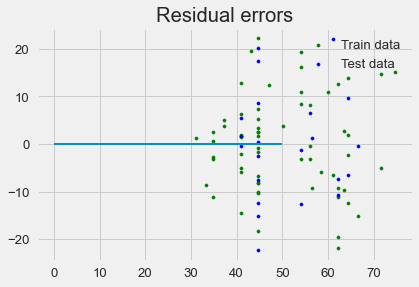

In [91]:
plt.style.use('fivethirtyeight')
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")

plt.show()


<AxesSubplot:title={'center':'Feature Importance'}, ylabel='Name'>

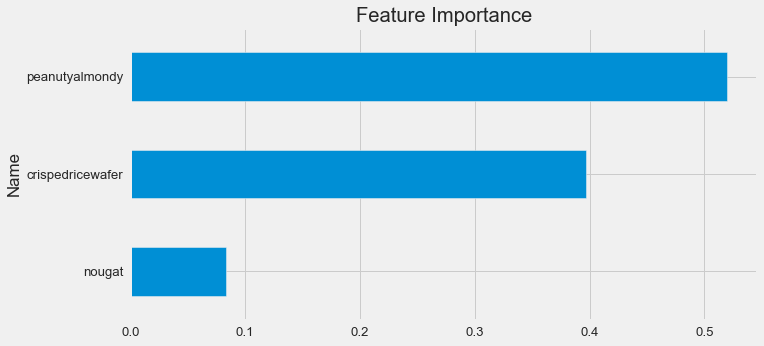

In [92]:
from sklearn import tree
reg = tree.DecisionTreeRegressor(max_depth=3).fit(df[df.columns[1:-1]],df[df.columns[-1]])
imp = pd.DataFrame.from_dict({'Name':df.columns[1:-1],'Importance':reg.feature_importances_})
imp_plt = imp.sort_values(by='Importance',ascending=True).reset_index(drop=True)
imp_plt[imp_plt.Importance>0].plot(kind='barh',x='Name',y='Importance',title='Feature Importance',sort_columns=True,figsize = (10,5),legend=False)

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(df[df.columns[1:-1]],df[df.columns[-1]], test_size=0.33, random_state=42)
rmse_err = []

In [114]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=5).fit(X_train,y_train)
rmse_err.append(math.sqrt(mean_squared_error(y_test,reg.predict(X_test))))
rmse_err[-1]

8.674483654181767

In [115]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=200).fit(X_train,y_train)
rmse_err.append(math.sqrt(mean_squared_error(y_test,rf_reg.predict(X_test))))
rmse_err[-1]

9.144217390124014

In [116]:
from sklearn.linear_model import Ridge
r_reg = Ridge(alpha = .5).fit(X_train,y_train)
rmse_err.append(math.sqrt(mean_squared_error(y_test,r_reg.predict(X_test))))
rmse_err[-1]

9.811441366026514

In [117]:
from sklearn.linear_model import Lasso
l_reg = Lasso(alpha = 0.1).fit(X_train,y_train)
rmse_err.append(math.sqrt(mean_squared_error(y_test,l_reg.predict(X_test))))
rmse_err[-1]

10.810513323914368

In [141]:
models = ['Decision Tree','RandomForest','Ridge','Lasso']
pd.DataFrame.from_dict({'Name':models,'RMSE':rmse_err}).sort_values(by='RMSE',ascending=False).plot(x='Name',y='RMSE',kind='barh',sort_columns=True,figsize = (10,5),legend=False,title='Performance of various Regression based Models')

ValueError: arrays must all be same length